# Lakh Statistics

In [42]:
# Imports 
from music21 import *
# Imports from Dr. Raffel 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pretty_midi
import librosa
import mir_eval
import mir_eval.display
import tables
import IPython.display
from IPython.display import Audio
import os
import json
from tqdm import tqdm
# In the case you want new libraries just do !pip install --user <PACKAGEGE>

In [ ]:
# References
#https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_resnet.ipynb
#https://nbviewer.org/github/craffel/midi-ground-truth/blob/master/Statistics.ipynb

In [2]:
import pretty_midi
import numpy as np
import joblib
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
import os
# plotting.py contains utility functions for making nice histogram plots
import plotting

In [49]:
#referenced from raffel 
def compute_statistics(midi_file):
    """
    Given a path to a MIDI file, compute a dictionary of statistics about it
    
    Parameters
    ----------
    midi_file : str
        Path to a MIDI file.
   

    Returns
    -------
    statistics : dict
        Dictionary reporting the values for different events in the file.
    """
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments),
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics]}
    # Silently ignore exceptions for a clean presentation (sorry Python!)
    except Exception as e:
        print("Error processing MIDI files:", e, midi_file)
        pass

In [50]:

# statistics = joblib.Parallel(n_jobs=10, verbose=0)(
#     joblib.delayed(compute_statistics)(midi_file)
#     for midi_file in glob.glob(os.path.join(clean_midi_path, '*', '*.mid')))
# statistics = [s for s in statistics if s is not None]

statistics = []
for midi_file in tqdm(glob.glob(os.path.join(clean_midi_path, '*', '*.mid'))):
    stats = compute_statistics(midi_file)
    if stats is not None:
        statistics.append(stats)

  0%|          | 1/17243 [00:00<31:22,  9.16it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Ryan Paris/La Dolce Vita.1.mid


  0%|          | 53/17243 [00:06<39:57,  7.17it/s] 

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Stan Kenton/Here's That Rainy Day.mid


  1%|          | 141/17243 [00:18<34:17,  8.31it/s] 

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/John Elton/Nikita.2.mid


  2%|▏         | 384/17243 [00:39<20:46, 13.53it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/John Paul Young/Love is in the Air.3.mid


  2%|▏         | 409/17243 [00:42<21:04, 13.32it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Doors/The Crystal Ship.3.mid


  3%|▎         | 438/17243 [00:46<22:43, 12.33it/s]

Error processing MIDI files:  ../data/clean_midi/The Doors/Riders on the Storm.1.mid


  4%|▍         | 652/17243 [01:06<23:59, 11.52it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Peter Gabriel/Solsbury Hill.mid


  4%|▍         | 658/17243 [01:07<28:42,  9.63it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Peter Gabriel/Solsbury Hill.1.mid


  4%|▍         | 756/17243 [01:16<34:04,  8.07it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Sting/Fields of Gold.1.mid


  5%|▍         | 795/17243 [01:21<31:39,  8.66it/s]

Error processing MIDI files: no MTrk header at start of track ../data/clean_midi/Sting/Fields of Gold.7.mid


  6%|▌         | 975/17243 [01:41<39:36,  6.85it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Prodigy/Climbatize.mid


  6%|▌         | 979/17243 [01:41<32:11,  8.42it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Prodigy/Wind It Up.mid


  7%|▋         | 1167/17243 [01:57<24:42, 10.85it/s]  

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Emerson, Lake & Palmer/Hoedown.mid


  7%|▋         | 1180/17243 [01:59<48:44,  5.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Emerson, Lake & Palmer/Fanfare for the Common Man.2.mid


  7%|▋         | 1211/17243 [02:05<43:19,  6.17it/s]  

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Cocciante/Ammassati e distanti.mid


  7%|▋         | 1246/17243 [02:09<24:31, 10.87it/s]

Error processing MIDI files:  ../data/clean_midi/Alice in Chains/Sludge Factory.mid


  8%|▊         | 1317/17243 [02:15<25:00, 10.61it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/U2/Where the Streets Have No Name.7.mid


  8%|▊         | 1346/17243 [02:19<30:23,  8.72it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/U2/Walk On.mid


  8%|▊         | 1446/17243 [02:33<26:37,  9.89it/s]

Error processing MIDI files:  ../data/clean_midi/Garbage/Stupid Girl.3.mid


  8%|▊         | 1457/17243 [02:34<35:26,  7.42it/s]

Error processing MIDI files:  ../data/clean_midi/Garbage/Cherry Lips.mid


  9%|▉         | 1556/17243 [02:45<27:54,  9.37it/s]

Error processing MIDI files:  ../data/clean_midi/The Rolling Stones/The Last Time.mid


 10%|█         | 1750/17243 [03:10<22:28, 11.49it/s]  

Error processing MIDI files: MIDI file has a largest tick of 25433089, it is likely corrupt ../data/clean_midi/Simon & Garfunkel/The Sound of Silence.2.mid


 11%|█         | 1860/17243 [03:19<18:04, 14.19it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Peter, Paul & Mary/Puff.1.mid


 12%|█▏        | 2005/17243 [03:36<24:23, 10.41it/s]  

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rene Carol/Rote Rosen rote Lippen roter Wein.mid


 13%|█▎        | 2168/17243 [03:55<24:24, 10.29it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jean Michel Jarre/Calypso, Part 2.mid


 13%|█▎        | 2180/17243 [03:57<24:46, 10.14it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Yanni/Marching Season.1.mid
Error processing MIDI files: running status without last_status ../data/clean_midi/Yanni/Swept Away.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Yanni/Secret Vows.1.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Yanni/Aria.1.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Yanni/The Rain Must Fall.1.mid


 13%|█▎        | 2223/17243 [04:01<28:20,  8.83it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Level 42/Lessons in Love.2.mid


 13%|█▎        | 2263/17243 [04:06<28:25,  8.78it/s]

Error processing MIDI files: Message length 2093056 exceeds maximum length 1000000 ../data/clean_midi/Bee Gees/Stayin Alive.3.mid


 13%|█▎        | 2274/17243 [04:07<23:58, 10.40it/s]

Error processing MIDI files: MIDI file has a largest tick of 12884927490, it is likely corrupt ../data/clean_midi/Bee Gees/How Can You Mend a Broken Heart.1.mid


 13%|█▎        | 2284/17243 [04:08<21:00, 11.87it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Bee Gees/Too Much Heaven.mid


 13%|█▎        | 2326/17243 [04:13<24:21, 10.21it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Henry Arland/Rosenmelodie.mid


 14%|█▎        | 2352/17243 [04:15<18:32, 13.38it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Every Little Thing.mid


 14%|█▍        | 2490/17243 [04:26<15:37, 15.73it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Fool on the Hill.2.mid


 15%|█▍        | 2557/17243 [04:31<15:49, 15.47it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Ticket to Ride.6.mid


 15%|█▌        | 2596/17243 [04:33<10:23, 23.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Let It Be.5.mid


 17%|█▋        | 2864/17243 [04:53<14:43, 16.27it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Fool on the Hill.mid


 17%|█▋        | 2882/17243 [04:55<15:44, 15.21it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/All You Need Is Love.3.mid


 17%|█▋        | 2971/17243 [05:02<16:50, 14.13it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Fixing a Hole.mid


 17%|█▋        | 2978/17243 [05:02<15:27, 15.37it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Octopus's Garden.mid


 18%|█▊        | 3026/17243 [05:06<17:58, 13.18it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Get Back.3.mid


 18%|█▊        | 3060/17243 [05:09<15:28, 15.27it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beatles/Paperback Writer.4.mid


 18%|█▊        | 3164/17243 [05:18<18:31, 12.67it/s]

Error processing MIDI files:  ../data/clean_midi/Brian McKnight/On the Down Low.mid


 19%|█▉        | 3343/17243 [05:41<26:27,  8.76it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Asia/Don't Cry.1.mid


 20%|█▉        | 3364/17243 [05:44<21:43, 10.64it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/3T/Why.mid


 21%|██        | 3562/17243 [06:06<27:05,  8.41it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rene Froger/Thunder in My Heart.mid


 21%|██▏       | 3668/17243 [06:20<17:49, 12.69it/s]  

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pooh/Il cielo e blu sopra le nuvole.mid


 23%|██▎       | 3889/17243 [06:46<14:51, 14.98it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Platters/Only You.5.mid


 23%|██▎       | 3919/17243 [06:49<25:34,  8.69it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Huey Lewis & The News/The Power of Love.mid


 23%|██▎       | 4032/17243 [07:02<16:26, 13.39it/s]

Error processing MIDI files: Could not decode key with 4 flats and mode 255 ../data/clean_midi/Dan Fogelberg/Leader Of The Band.mid


 24%|██▍       | 4133/17243 [07:15<19:15, 11.35it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rush/Closer to the Heart.3.mid


 24%|██▍       | 4180/17243 [07:19<12:43, 17.12it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Rush/Broon's Bane.1.mid


 24%|██▍       | 4201/17243 [07:21<26:07,  8.32it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rush/Leave That Thing Alone.mid


 26%|██▌       | 4435/17243 [07:50<18:29, 11.55it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Outhere Brothers/Don't Stop (Wiggle Wiggle).1.mid


 26%|██▌       | 4496/17243 [07:57<16:50, 12.61it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Morton Jelly Roll/Frog-I-More Rag.mid


 26%|██▋       | 4541/17243 [08:02<19:25, 10.90it/s]

Error processing MIDI files:  ../data/clean_midi/Aerosmith/Pink.3.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Aerosmith/Dream On.mid


 27%|██▋       | 4592/17243 [08:07<16:32, 12.74it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Gina G/Ooh Ahh Just a Little Bit.mid


 27%|██▋       | 4602/17243 [08:08<14:01, 15.02it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Third Eye Blind/Semi-Charmed Life.1.mid
Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Third Eye Blind/Semi-Charmed Life.mid


 28%|██▊       | 4840/17243 [08:34<18:52, 10.96it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Energy 52/Cafe del Mar.mid


 29%|██▊       | 4951/17243 [08:46<25:48,  7.94it/s]

Error processing MIDI files: Message length 2093056 exceeds maximum length 1000000 ../data/clean_midi/Los Del Rio/Macarena.1.mid


 30%|███       | 5223/17243 [09:15<11:19, 17.69it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Barry Manilow/Copa Cabana (disco).mid


 31%|███       | 5264/17243 [09:23<27:27,  7.27it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Earth, Wind & Fire/September (bonus track).4.mid


 31%|███       | 5272/17243 [09:24<20:25,  9.77it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Marc Anthony/Vivir Lo Nuestro.mid


 31%|███       | 5329/17243 [09:32<25:17,  7.85it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Bernstein Leonard/West Side Story: Medley.1.mid


 32%|███▏      | 5531/17243 [09:57<21:27,  9.10it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/McDonald/Yah Mo B There.mid


 32%|███▏      | 5541/17243 [09:58<18:53, 10.32it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Darin Bobby/Splish Splash.mid


 32%|███▏      | 5576/17243 [10:04<27:21,  7.11it/s]

Error processing MIDI files:  ../data/clean_midi/Metallica/The Unforgiven.3.mid


 32%|███▏      | 5590/17243 [10:06<25:17,  7.68it/s]

Error processing MIDI files:  ../data/clean_midi/Metallica/The Shortest Straw.1.mid


 33%|███▎      | 5656/17243 [10:15<22:22,  8.63it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Metallica/The Unforgiven.5.mid


 33%|███▎      | 5662/17243 [10:16<32:00,  6.03it/s]

Error processing MIDI files:  ../data/clean_midi/Metallica/(Anesthesia)-Pulling Teeth.mid


 33%|███▎      | 5736/17243 [10:27<13:31, 14.18it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Los Lobos/La Bamba.mid


 34%|███▍      | 5841/17243 [10:39<12:14, 15.53it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Frank Sinatra/Summer Wind.mid


 35%|███▍      | 5954/17243 [10:55<16:49, 11.18it/s]

Error processing MIDI files:  ../data/clean_midi/Buddy Holly/Peggy Sue.1.mid


 35%|███▍      | 6009/17243 [11:02<27:18,  6.86it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Parker Charlie/Donna Lee.mid


 35%|███▍      | 6018/17243 [11:03<18:23, 10.17it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rednex/The Ultimate Rednex Mega Mix, Part 3: Cotton Eye Joe.mid


 36%|███▋      | 6266/17243 [11:36<14:42, 12.44it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Billy Joel/Pressure.mid


 37%|███▋      | 6303/17243 [11:39<10:54, 16.70it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Billy Joel/Movin' Out (Anthony's Song).mid


 37%|███▋      | 6326/17243 [11:42<16:57, 10.73it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Billy Joel/Pressure.2.mid


 38%|███▊      | 6480/17243 [12:01<25:37,  7.00it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Live/Selling the Drama.mid


 38%|███▊      | 6537/17243 [12:08<17:43, 10.07it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Styx/Come Sail Away.4.mid


 38%|███▊      | 6585/17243 [12:14<10:37, 16.73it/s]

Error processing MIDI files: Could not decode key with 4 flats and mode 255 ../data/clean_midi/Cabrel Francis/Question d'equilibre.mid
Error processing MIDI files: Could not decode key with 4 flats and mode 255 ../data/clean_midi/Cabrel Francis/Encore et encore.mid


 38%|███▊      | 6637/17243 [12:18<09:44, 18.15it/s]

Error processing MIDI files: Could not decode key with 5 flats and mode 255 ../data/clean_midi/Amos, Tori/The Wrong Band.mid


 39%|███▉      | 6685/17243 [12:25<25:58,  6.77it/s]

Error processing MIDI files:  ../data/clean_midi/Bon Jovi/Blaze of Glory.2.mid


 40%|███▉      | 6858/17243 [12:46<16:41, 10.37it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Vangelis/Chariots of Fire.5.mid


 41%|████      | 6995/17243 [13:05<16:18, 10.47it/s]  

Error processing MIDI files: Could not decode key with 11 sharps and mode 227 ../data/clean_midi/Theodorakis Mikis/Zorba's Dance.1.mid


 41%|████      | 7102/17243 [13:20<22:34,  7.48it/s]

Error processing MIDI files: Could not decode key with 3 flats and mode 255 ../data/clean_midi/Toto/I Won't Hold You Back.mid


 41%|████▏     | 7121/17243 [13:22<15:43, 10.72it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Us3/Cantaloop.1.mid


 41%|████▏     | 7132/17243 [13:23<12:00, 14.04it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Boyz II Men/End of the Road.2.mid


 41%|████▏     | 7142/17243 [13:24<15:56, 10.56it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/The Cranberries/Promises.1.mid


 42%|████▏     | 7202/17243 [13:33<27:56,  5.99it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Cranberries/Animal Instinct.mid


 43%|████▎     | 7470/17243 [14:05<14:46, 11.02it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Steppenwolf/Born To Be Wild.3.mid


 43%|████▎     | 7492/17243 [14:08<20:07,  8.08it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Aqua/Dr Jones.mid


 44%|████▎     | 7515/17243 [14:11<17:04,  9.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Lenny Kravitz/I Belong To You.mid


 45%|████▍     | 7681/17243 [14:32<23:09,  6.88it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Right Said Fred/Don't Talk Just Kiss.mid


 46%|████▌     | 7919/17243 [14:59<08:33, 18.14it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Clayderman Richard/Ballade Pour Adeline.mid


 46%|████▌     | 7974/17243 [15:04<16:08,  9.57it/s]

Error processing MIDI files: Could not decode key with 5 flats and mode 255 ../data/clean_midi/Eurythmics/Who's That Girl.mid


 46%|████▋     | 7981/17243 [15:05<16:54,  9.13it/s]

Error processing MIDI files: Could not decode key with 3 flats and mode 255 ../data/clean_midi/Eurythmics/Sweet Dreams.4.mid


 47%|████▋     | 8170/17243 [15:31<19:42,  7.67it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Miami Sound Machine/Here We Are.mid


 48%|████▊     | 8192/17243 [15:35<21:10,  7.12it/s]

Error processing MIDI files:  ../data/clean_midi/Jamiroquai/Canned Heat.1.mid


 48%|████▊     | 8247/17243 [15:40<07:56, 18.89it/s]

Error processing MIDI files: Could not decode key with 15 sharps and mode 66 ../data/clean_midi/Sinatra/Where or When.mid


 49%|████▊     | 8398/17243 [15:53<14:26, 10.21it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Eric Clapton/Tears in Heaven.7.mid


 50%|████▉     | 8540/17243 [16:09<20:22,  7.12it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/10cc/Dreadlock Holiday.4.mid


 50%|████▉     | 8555/17243 [16:10<12:59, 11.14it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Tool/Flood.mid


 50%|█████     | 8622/17243 [16:18<17:29,  8.22it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Smashing Pumpkins/Cherub Rock.mid


 51%|█████     | 8736/17243 [16:32<17:29,  8.10it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Dalla/Anna e Marco.mid


 51%|█████     | 8761/17243 [16:36<14:46,  9.57it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Dee/The Legend Of Xanadu.1.mid


 51%|█████▏    | 8841/17243 [16:44<18:41,  7.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Radiohead/Karma Police.mid


 51%|█████▏    | 8848/17243 [16:45<12:46, 10.96it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Radiohead/Climbing Up the Walls.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Radiohead/Subterranean Homesick Alien.mid


 51%|█████▏    | 8857/17243 [16:46<09:15, 15.11it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Radiohead/Airbag.mid


 52%|█████▏    | 8973/17243 [16:57<14:00,  9.84it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Daft Punk/Da Funk.mid


 54%|█████▎    | 9241/17243 [17:28<11:02, 12.07it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Bryan Adams/(Everything I Do) I Do It For You.7.mid


 54%|█████▍    | 9364/17243 [17:39<08:12, 16.00it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Mariah Carey/Forever.mid


 54%|█████▍    | 9377/17243 [17:40<11:55, 11.00it/s]

Error processing MIDI files:  ../data/clean_midi/Mariah Carey/Long Ago.mid


 55%|█████▍    | 9442/17243 [17:47<14:22,  9.05it/s]

Error processing MIDI files: Message length 2093056 exceeds maximum length 1000000 ../data/clean_midi/The Police/So Lonely.1.mid


 55%|█████▍    | 9445/17243 [17:47<12:23, 10.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Police/Every Little Thing She Does Is Magic.4.mid


 55%|█████▌    | 9555/17243 [18:01<14:03,  9.11it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Whitney Houston/I'm Every Woman.1.mid


 56%|█████▌    | 9595/17243 [18:06<15:23,  8.28it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Whitney Houston/Saving All My Love For You.2.mid


 56%|█████▌    | 9664/17243 [18:13<07:37, 16.55it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Journey/Lovin' Touchin' Squeezin'.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Journey/Any Way You Want It.mid


 56%|█████▌    | 9694/17243 [18:16<07:41, 16.34it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Journey/Lights.mid


 57%|█████▋    | 9777/17243 [18:26<10:28, 11.89it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Phish/Taste.mid


 57%|█████▋    | 9782/17243 [18:26<08:34, 14.50it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Rammstein/Stripped.mid


 58%|█████▊    | 9944/17243 [18:44<10:02, 12.12it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Coolio/Gangsta's Paradise.3.mid


 58%|█████▊    | 9966/17243 [18:46<12:14,  9.91it/s]

Error processing MIDI files: MIDI file has a largest tick of 4295115785, it is likely corrupt ../data/clean_midi/Rob Zombie/Demonoid Phenomenon.mid


 58%|█████▊    | 10045/17243 [18:56<18:12,  6.59it/s]

Error processing MIDI files: undefined status byte 0xf5 ../data/clean_midi/Pet Shop Boys/Always on My Mind   In My House.3.mid


 59%|█████▊    | 10092/17243 [19:04<25:46,  4.62it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Andre Brasseur/Early Bird Satellite.1.mid


 59%|█████▊    | 10103/17243 [19:05<11:18, 10.53it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Jennifer Lopez/If You Had My Love.mid


 59%|█████▊    | 10127/17243 [19:08<13:06,  9.04it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Billy Swan/I Can Help.1.mid


 59%|█████▉    | 10191/17243 [19:17<11:39, 10.08it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rossi Vasco/Vivere.mid


 61%|██████    | 10467/17243 [19:49<09:44, 11.60it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Boomtown Rats/I Don't Like Monday's.1.mid


 61%|██████    | 10513/17243 [19:53<08:23, 13.37it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Celine Dion/Where Does My Heart Beat Now.mid


 61%|██████    | 10526/17243 [19:55<10:42, 10.45it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Celine Dion/That's The Way It Is.mid


 61%|██████▏   | 10580/17243 [20:02<11:03, 10.04it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Celine Dion/Where Does My Heart Beat Now.1.mid


 62%|██████▏   | 10609/17243 [20:05<12:12,  9.05it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Cream/Strange Brew.1.mid


 62%|██████▏   | 10727/17243 [20:23<14:39,  7.41it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Whigfield/Saturday Night.1.mid


 63%|██████▎   | 10830/17243 [20:36<09:48, 10.90it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Crow Sheryl/Tomorrow Never Dies.mid


 64%|██████▎   | 10973/17243 [20:51<09:19, 11.21it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/UB40/Homely Girl.mid


 64%|██████▍   | 11033/17243 [20:58<08:49, 11.73it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Tom Jones/Delilah.5.mid


 64%|██████▍   | 11087/17243 [21:05<08:44, 11.73it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nomadi/Io vagabondo.4.mid


 64%|██████▍   | 11118/17243 [21:09<10:07, 10.08it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nomadi/Io vagabondo.2.mid


 65%|██████▍   | 11164/17243 [21:14<10:30,  9.64it/s]

Error processing MIDI files: MIDI file has a largest tick of 4312862115, it is likely corrupt ../data/clean_midi/Blondie/Dreaming.mid


 65%|██████▌   | 11210/17243 [21:19<06:33, 15.31it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Beastie Boys/Girls.mid


 65%|██████▌   | 11216/17243 [21:19<08:35, 11.69it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Sam Cooke/Twisting the Night Away.mid


 65%|██████▌   | 11220/17243 [21:20<13:14,  7.58it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/4 Non Blondes/What's Up.5.mid


 66%|██████▌   | 11326/17243 [21:34<09:58,  9.89it/s]

Error processing MIDI files:  ../data/clean_midi/Supertramp/The Logical Song.7.mid


 66%|██████▌   | 11341/17243 [21:36<11:22,  8.64it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Supertramp/Bloody Well Right.mid


 66%|██████▌   | 11363/17243 [21:39<09:13, 10.63it/s]

Error processing MIDI files: Could not decode key with 12 sharps and mode 95 ../data/clean_midi/Henry Mancini/Moon River.mid


 66%|██████▌   | 11389/17243 [21:42<09:34, 10.19it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Camel/The Snow Goose.mid


 66%|██████▌   | 11392/17243 [21:42<13:51,  7.03it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Camel/The Snow Goose.1.mid


 67%|██████▋   | 11633/17243 [22:12<08:13, 11.37it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beach Boys/Good Vibrations.6.mid


 68%|██████▊   | 11705/17243 [22:19<08:11, 11.27it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Beach Boys/I Get Around.2.mid


 68%|██████▊   | 11748/17243 [22:24<08:50, 10.35it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jimi Hendrix/Purple Haze.2.mid


 68%|██████▊   | 11774/17243 [22:27<08:31, 10.69it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The KLF/Justified and Ancient.1.mid


 68%|██████▊   | 11784/17243 [22:28<11:54,  7.64it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Basie/I Left My Heart in San Francisco.mid


 69%|██████▉   | 11897/17243 [22:42<07:31, 11.85it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Shakatak/Night Birds.1.mid


 69%|██████▉   | 11914/17243 [22:44<07:22, 12.05it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Yazz & plastic population/The Only Way Is Up.1.mid


 69%|██████▉   | 11918/17243 [22:45<07:37, 11.64it/s]

Error processing MIDI files: MIDI file has a largest tick of 12027564, it is likely corrupt ../data/clean_midi/Last/Rosamunde.1.mid


 69%|██████▉   | 11961/17243 [22:49<10:20,  8.52it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Andre Hazes/Ik meen 't.2.mid


 70%|██████▉   | 12017/17243 [22:55<07:51, 11.08it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Alison Moyet/All Cried Out.mid


 71%|███████   | 12233/17243 [23:19<07:49, 10.68it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Johnny Mercer/Come Rain or Come Shine.mid


 71%|███████▏  | 12304/17243 [23:27<06:25, 12.80it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/High Hopes.2.mid


 71%|███████▏  | 12309/17243 [23:27<05:54, 13.91it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/Hey You.mid


 71%|███████▏  | 12314/17243 [23:28<06:41, 12.27it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/Echoes.1.mid


 71%|███████▏  | 12321/17243 [23:28<05:38, 14.54it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/Echoes.mid


 72%|███████▏  | 12329/17243 [23:29<07:36, 10.77it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/Wish You Were Here.mid


 72%|███████▏  | 12336/17243 [23:30<10:34,  7.74it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Pink Floyd/Nobody Home.mid


 72%|███████▏  | 12340/17243 [23:30<08:01, 10.18it/s]

Error processing MIDI files:  ../data/clean_midi/Pink Floyd/The Trial.1.mid


 72%|███████▏  | 12418/17243 [23:41<10:17,  7.81it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Led Zeppelin/In The Evening.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Led Zeppelin/Stairway To Heaven.mid


 72%|███████▏  | 12457/17243 [23:46<08:30,  9.37it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Led Zeppelin/Custard Pie.mid


 73%|███████▎  | 12543/17243 [23:59<09:14,  8.48it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Stevens Shakin /You Drive Me Crazy.1.mid


 73%|███████▎  | 12553/17243 [24:00<08:20,  9.37it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Robert Palmer/Mercy Mercy Me   I Want You.mid


 73%|███████▎  | 12561/17243 [24:02<09:55,  7.86it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Robert Palmer/I'll Be Your Baby Tonight.1.mid


 74%|███████▎  | 12696/17243 [24:18<07:56,  9.55it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Kylie Minogue/Better the Devil.mid


 74%|███████▎  | 12698/17243 [24:18<07:09, 10.58it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Kylie Minogue/Especially for You.1.mid


 74%|███████▍  | 12793/17243 [24:30<08:12,  9.03it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Elton John/A Word in Spanish.1.mid


 74%|███████▍  | 12800/17243 [24:31<09:22,  7.90it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Elton John/Nikita.mid


 74%|███████▍  | 12835/17243 [24:35<07:36,  9.66it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Aaron Neville/Tell It Like It Is.mid


 75%|███████▌  | 12938/17243 [24:46<06:26, 11.14it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Shirley Bassey/Big Spender.mid


 75%|███████▌  | 12953/17243 [24:48<08:21,  8.55it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Marley Bob/Iron Lion Zion.mid


 75%|███████▌  | 12976/17243 [24:51<07:18,  9.73it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 163 ../data/clean_midi/The Alan Parsons Project/Sirius   Eye in the Sky.mid


 76%|███████▌  | 13021/17243 [24:57<08:20,  8.44it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Four Seasons/Walk Like A Man.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Four Seasons/Rag Doll.mid


 76%|███████▌  | 13041/17243 [24:59<08:52,  7.89it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Miller/When Sunny Gets Blue.mid


 77%|███████▋  | 13210/17243 [25:19<08:34,  7.83it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Amedeo Minghi/Decenni.1.mid


 77%|███████▋  | 13248/17243 [25:22<06:44,  9.87it/s]

Error processing MIDI files: Could not decode key with 0 flats and mode 2 ../data/clean_midi/Roy Orbison/Oh Pretty Woman.2.mid


 78%|███████▊  | 13443/17243 [25:44<05:53, 10.76it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Neil Diamond/Hello Again.mid


 78%|███████▊  | 13466/17243 [25:46<04:35, 13.73it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 2 ../data/clean_midi/Neil Diamond/(Encore) Cracklin' Rose.mid


 80%|███████▉  | 13736/17243 [26:18<05:23, 10.82it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Van Halen/Jump.5.mid


 80%|███████▉  | 13743/17243 [26:18<03:38, 16.04it/s]

Error processing MIDI files:  ../data/clean_midi/Van Halen/Me Wise Magic.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Van Halen/Right Now.1.mid


 80%|████████  | 13801/17243 [26:25<05:29, 10.43it/s]

Error processing MIDI files: MIDI file has a largest tick of 196929468, it is likely corrupt ../data/clean_midi/The Offspring/Gone Away.1.mid
Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/The Offspring/No Hero.mid


 81%|████████  | 13891/17243 [26:36<06:33,  8.53it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Wonder Stevie/Sir Duke.1.mid


 81%|████████  | 13895/17243 [26:37<08:15,  6.76it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Wonder Stevie/Happy Birthday.mid


 81%|████████  | 13971/17243 [26:47<05:32,  9.83it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nelly/Country Grammar (Hot ...).mid


 81%|████████  | 13991/17243 [26:50<06:50,  7.92it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/a-ha/Take On Me.1.mid


 81%|████████▏ | 14027/17243 [26:54<07:25,  7.23it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Matt Bianco/Half a Minute.mid


 82%|████████▏ | 14152/17243 [27:08<06:24,  8.04it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Juan Luis Guerra/La Bilirrubina.1.mid


 83%|████████▎ | 14313/17243 [27:29<04:56,  9.89it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Madonna/Rain.4.mid


 83%|████████▎ | 14356/17243 [27:34<03:57, 12.16it/s]

Error processing MIDI files:  ../data/clean_midi/Madonna/Like A Virgin.mid


 83%|████████▎ | 14375/17243 [27:36<05:17,  9.03it/s]

Error processing MIDI files: Message length 2093056 exceeds maximum length 1000000 ../data/clean_midi/Madonna/Deeper and Deeper.mid


 84%|████████▍ | 14506/17243 [27:49<02:53, 15.78it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Depeche Mode/Shake the Disease.mid


 85%|████████▍ | 14643/17243 [28:07<04:42,  9.21it/s]

Error processing MIDI files: Could not decode key with 14 sharps and mode 78 ../data/clean_midi/Nini Rosso/Il Silenzio.1.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Busta Rhymes/Woo Hah.mid


 85%|████████▌ | 14706/17243 [28:13<01:17, 32.53it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Enya/Bard Dance.mid


 86%|████████▌ | 14787/17243 [28:19<03:55, 10.44it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Bush/Glycerine.1.mid


 87%|████████▋ | 14935/17243 [28:36<04:43,  8.14it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nek/Se io non avessi te.2.mid


 87%|████████▋ | 14945/17243 [28:37<04:14,  9.01it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Bryson/Tonight I Celebrate My Love For You.mid


 87%|████████▋ | 14948/17243 [28:38<05:12,  7.34it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Scott McKenzie/Forrest Gump: San Francisco (Be Sure to Wear Some Flowers in Your Hair).1.mid


 87%|████████▋ | 14974/17243 [28:40<03:21, 11.27it/s]

Error processing MIDI files: Could not decode key with 1 flats and mode 255 ../data/clean_midi/Kalua Beach Boys/There's No Place Like Hawaii.mid


 89%|████████▊ | 15266/17243 [29:14<02:02, 16.17it/s]

Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/R.E.M./Nightswimming.mid


 89%|████████▊ | 15297/17243 [29:17<02:13, 14.52it/s]

Error processing MIDI files: no MTrk header at start of track ../data/clean_midi/Nirvana/Negative Creep.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Sliver.2.mid


 89%|████████▉ | 15306/17243 [29:17<01:49, 17.73it/s]

Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Been a Son.mid


 89%|████████▉ | 15313/17243 [29:18<02:17, 14.07it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Downer.1.mid
Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Milk It.1.mid


 89%|████████▉ | 15323/17243 [29:18<01:53, 16.93it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Dive.mid


 89%|████████▉ | 15346/17243 [29:20<01:37, 19.49it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Pennyroyal Tea.2.mid


 89%|████████▉ | 15357/17243 [29:21<02:20, 13.41it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Aneurysm.mid


 89%|████████▉ | 15363/17243 [29:21<01:36, 19.52it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Territorial Pissings.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Lounge Act.mid


 89%|████████▉ | 15370/17243 [29:21<01:47, 17.34it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Scentless Apprentice.mid


 89%|████████▉ | 15374/17243 [29:22<02:32, 12.22it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Smells Like Teen Spirit.8.mid
Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/(New Wave) Polly.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Swap Meet.mid


 89%|████████▉ | 15380/17243 [29:22<02:05, 14.85it/s]

Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Mr. Moustache.mid


 89%|████████▉ | 15386/17243 [29:23<02:14, 13.80it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Radio Friendly Unit Shifter.1.mid


 89%|████████▉ | 15388/17243 [29:23<03:11,  9.67it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/tourette's.1.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Hairspray Queen.1.mid


 89%|████████▉ | 15391/17243 [29:23<02:54, 10.62it/s]

Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Frances Farmer Will Have Her Revenge on Seattle.1.mid


 89%|████████▉ | 15397/17243 [29:24<02:09, 14.22it/s]

Error processing MIDI files: no MTrk header at start of track ../data/clean_midi/Nirvana/Drain You.mid


 89%|████████▉ | 15404/17243 [29:24<02:00, 15.30it/s]

Error processing MIDI files: no MTrk header at start of track ../data/clean_midi/Nirvana/Son of a Gun.2.mid
Error processing MIDI files: no MTrk header at start of track ../data/clean_midi/Nirvana/Love Buzz.mid


 89%|████████▉ | 15408/17243 [29:24<02:14, 13.63it/s]

Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Heart-Shaped Box.mid
Error processing MIDI files: running status without last_status ../data/clean_midi/Nirvana/Mexican Seafood.mid


 89%|████████▉ | 15423/17243 [29:25<01:48, 16.78it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Turnaround.mid


 89%|████████▉ | 15426/17243 [29:25<01:41, 17.82it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Polly.1.mid


 90%|████████▉ | 15436/17243 [29:26<01:43, 17.38it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/All Apologies.1.mid


 90%|████████▉ | 15441/17243 [29:26<01:38, 18.29it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nirvana/Dumb.2.mid


 90%|████████▉ | 15501/17243 [29:33<03:17,  8.80it/s]

Error processing MIDI files: Could not decode key with 2 flats and mode 255 ../data/clean_midi/Jethro Tull/Rainbow Blues.mid


 90%|█████████ | 15521/17243 [29:35<02:47, 10.29it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Ross/When You Tell Me That You Love Me.mid


 91%|█████████ | 15611/17243 [29:44<02:47,  9.72it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/LL Cool J/Hey Lover.mid


 91%|█████████ | 15635/17243 [29:47<02:12, 12.09it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Survivor/Is This Love.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Gompie/Alice (Who the X Is Alice) (Living Next Door to Alice).mid


 92%|█████████▏| 15821/17243 [30:12<03:14,  7.30it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Genesis/Misunderstanding.3.mid


 92%|█████████▏| 15917/17243 [30:25<02:34,  8.56it/s]

Error processing MIDI files:  ../data/clean_midi/Genesis/Abacab.3.mid


 93%|█████████▎| 15983/17243 [30:34<02:07,  9.88it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/TURNER TINA/Notbush City Limits.1.mid


 93%|█████████▎| 15993/17243 [30:35<02:47,  7.48it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Nick Kamen/I Promised Myself.1.mid


 93%|█████████▎| 15996/17243 [30:36<02:25,  8.57it/s]

Error processing MIDI files:  ../data/clean_midi/Sarah McLachlan/Adia.1.mid


 93%|█████████▎| 16064/17243 [30:43<03:21,  5.86it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jovanotti/Penso Positivo.mid


 93%|█████████▎| 16102/17243 [30:48<02:44,  6.93it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Chic/Chic Mystique.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Chic/Take My Love.mid


 95%|█████████▍| 16320/17243 [31:11<01:17, 11.89it/s]

Error processing MIDI files: MIDI file has a largest tick of 4295053573, it is likely corrupt ../data/clean_midi/Roxette/It Must Have Been Love (live studio).3.mid
Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Roxette/The Look.mid


 95%|█████████▍| 16377/17243 [31:16<01:24, 10.23it/s]

Error processing MIDI files: MIDI file has a largest tick of 33639950, it is likely corrupt ../data/clean_midi/Bruce Springsteen/Tenth Avenue Freeze-Out.1.mid


 95%|█████████▌| 16407/17243 [31:20<01:36,  8.68it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Knack/My Sharona.1.mid


 96%|█████████▌| 16496/17243 [31:29<01:02, 11.97it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/The Stylistics/I'm Stone in Love With You.mid


 96%|█████████▌| 16519/17243 [31:32<01:31,  7.89it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jackson Michael/Thriller.3.mid


 96%|█████████▌| 16541/17243 [31:35<01:11,  9.77it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jackson Michael/You Are Not Alone.mid
Error processing MIDI files: MThd not found. Probably not a MIDI file ../data/clean_midi/Jackson Michael/Smooth Criminal.mid


 96%|█████████▌| 16563/17243 [31:38<01:22,  8.26it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Jackson Michael/Smooth Criminal.4.mid
Error processing MIDI files: Could not decode key with 5 flats and mode 2 ../data/clean_midi/Jackson Michael/Childhood.mid
Error processing MIDI files:  ../data/clean_midi/Jackson Michael/I'll Be There.mid


 96%|█████████▋| 16628/17243 [31:47<01:35,  6.43it/s]

Error processing MIDI files: Message length 2093056 exceeds maximum length 1000000 ../data/clean_midi/Jackson Michael/Don't Stop 'Til You Get Enough.mid


 97%|█████████▋| 16707/17243 [31:55<00:37, 14.35it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Rascel/Arrividerci Roma.mid


 97%|█████████▋| 16765/17243 [32:02<00:47,  9.97it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/ABBA/I've Been Waiting For You.mid


 98%|█████████▊| 16817/17243 [32:10<00:50,  8.38it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/ABBA/Take a Chance on Me.3.mid


 98%|█████████▊| 16833/17243 [32:12<00:47,  8.64it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/ABBA/One Of Us.mid


 98%|█████████▊| 16856/17243 [32:15<00:47,  8.21it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/ABBA/Voulez Vous.1.mid


 98%|█████████▊| 16873/17243 [32:17<00:44,  8.31it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/ABBA/Thank You for the Music.2.mid


100%|█████████▉| 17233/17243 [33:02<00:00, 11.17it/s]

Error processing MIDI files: data byte must be in range 0..127 ../data/clean_midi/Commodores/Three Times a Lady.1.mid


100%|██████████| 17243/17243 [33:03<00:00,  8.69it/s]


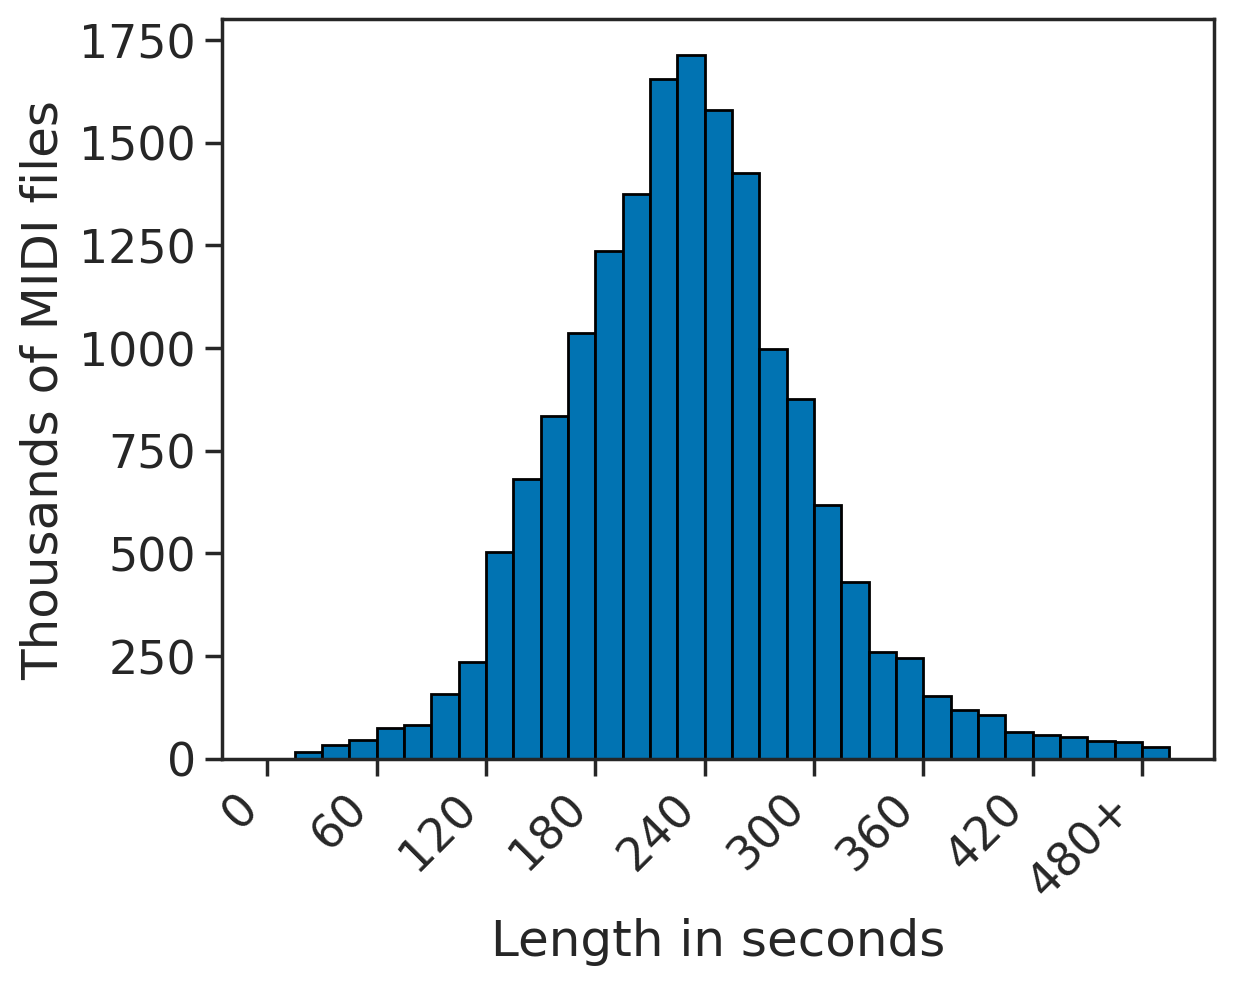

In [56]:
import matplotlib.pyplot as plt
import numpy as np

end_times = [s['end_time'] for s in statistics]
bins = np.arange(0, 500, 15)

# Plot histogram
plt.hist(end_times, bins=bins, edgecolor='black')
plt.xlabel('Length in seconds')b
plt.ylabel('Thousands of MIDI files')

# Set x-axis ticks at the correct positions
xticks = np.arange(0, len(bins), 4)  # Ticks at intervals of 4 in bins
xtick_labels = list(range(0, 430, 60)) + ['480+']  # Labels

# Set x-ticks to be aligned with the bins
plt.xticks(bins[xticks], xtick_labels, rotation=45, ha='right')

plt.show()


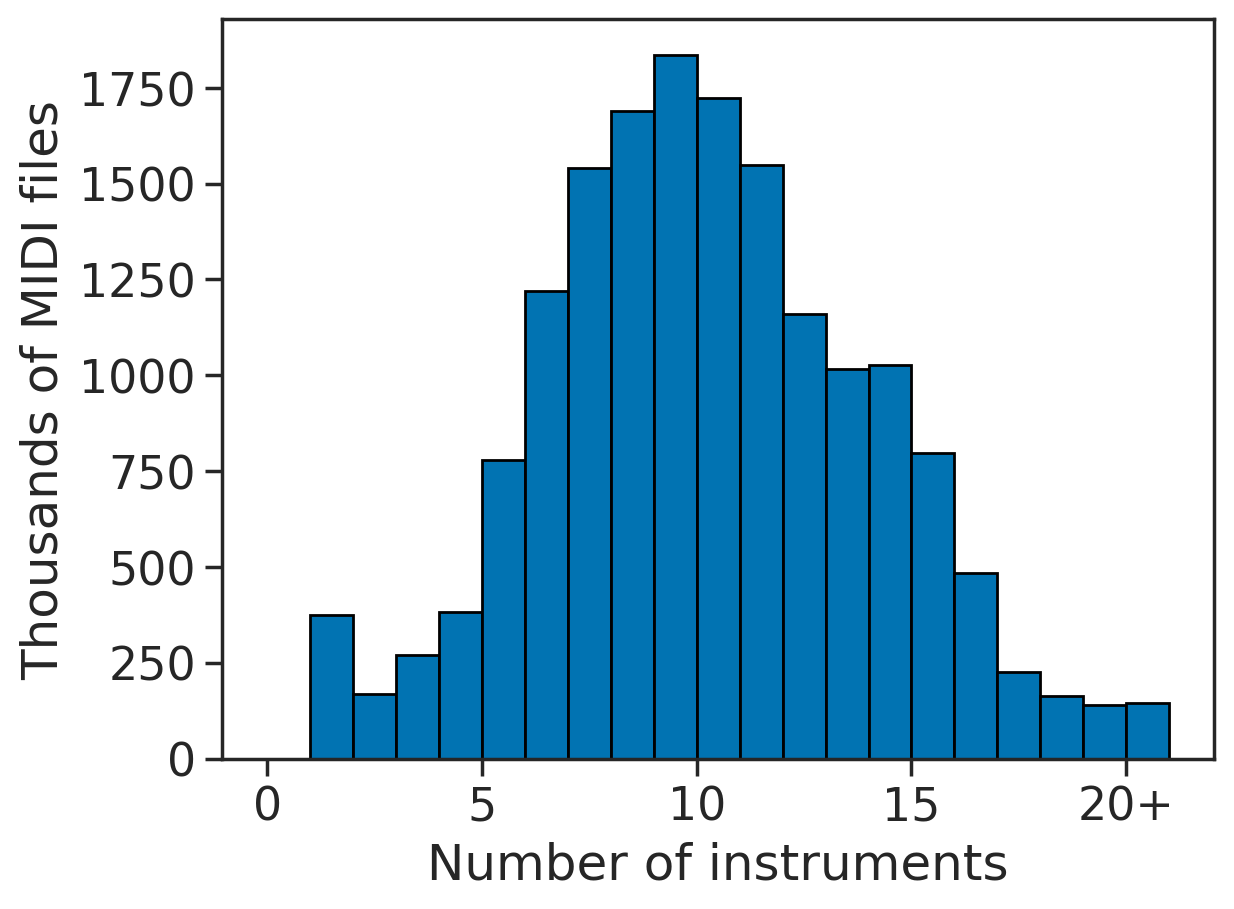

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'statistics' is a list of dictionaries where each dictionary has 'n_instruments'
n_instruments = [s['n_instruments'] for s in statistics]

# Plot histogram
plt.hist(n_instruments, bins=np.arange(0, 22, 1), edgecolor='black')

# Set axis labels
plt.xlabel('Number of instruments')
plt.ylabel('Thousands of MIDI files')

# Set the tick positions and labels
xticks = np.arange(0, 21, 5)  # Tick positions at 0, 5, 10, 15, 20
xtick_labels = [str(i) for i in range(0, 21, 5)]  # Tick labels at 0, 5, 10, 15, 20
xtick_labels[-1] = '20+'  # Change the last label to '20+'
plt.xticks(xticks, xtick_labels)

# Show the plot
plt.show()



In [63]:
songs_with_one_instrument = [s for s in statistics if s['n_instruments'] == 1]
print(len(songs_with_one_instrument)) #FUN NUMBER!

374


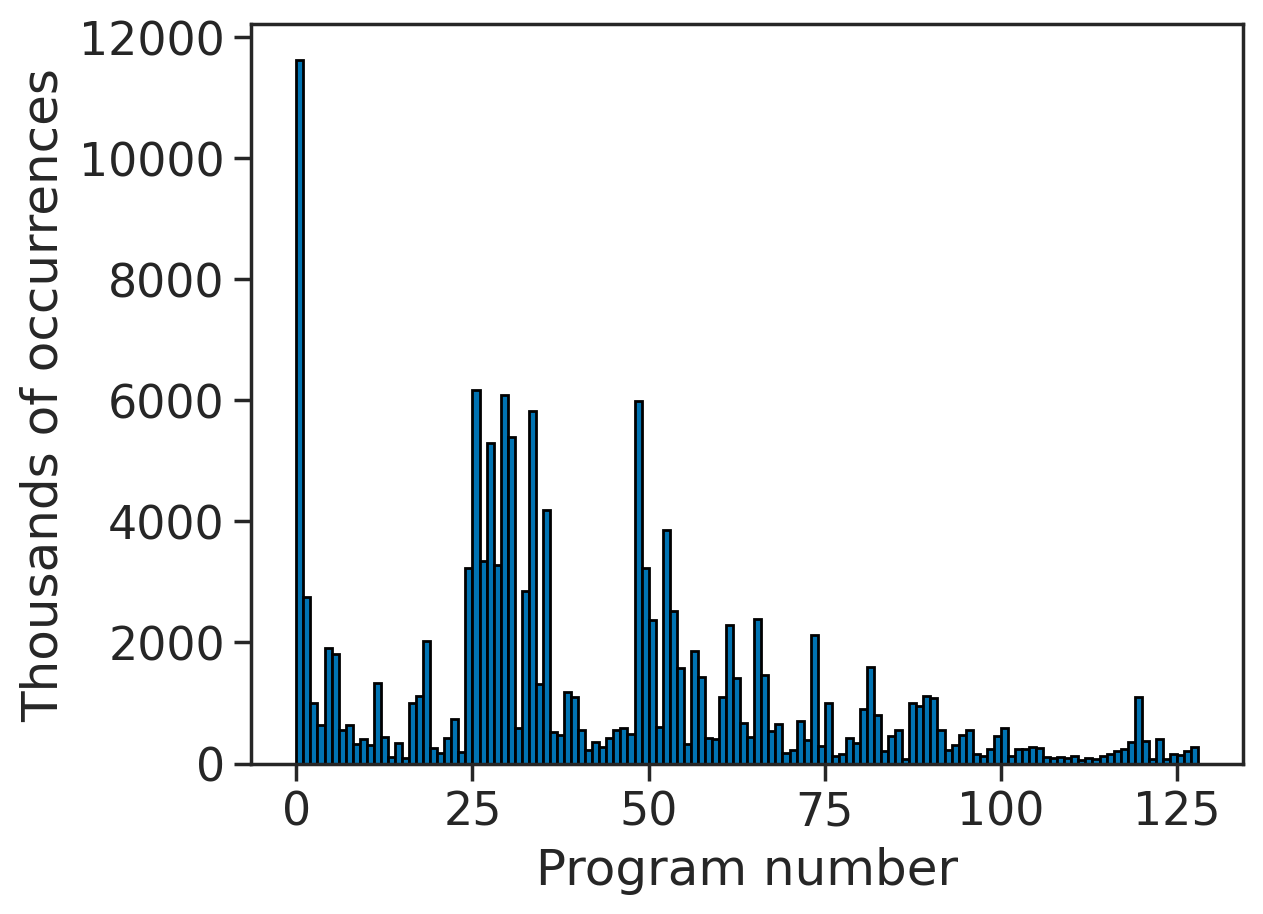

In [71]:
program_numbers = [i for s in statistics for i in s['programb_numbers']]

plt.hist(program_numbers, bins=np.arange(0, 129, 1), edgecolor='black')

plt.xlabel('Program number')
plt.ylabel('Thousands of occurrences')
plt.show()

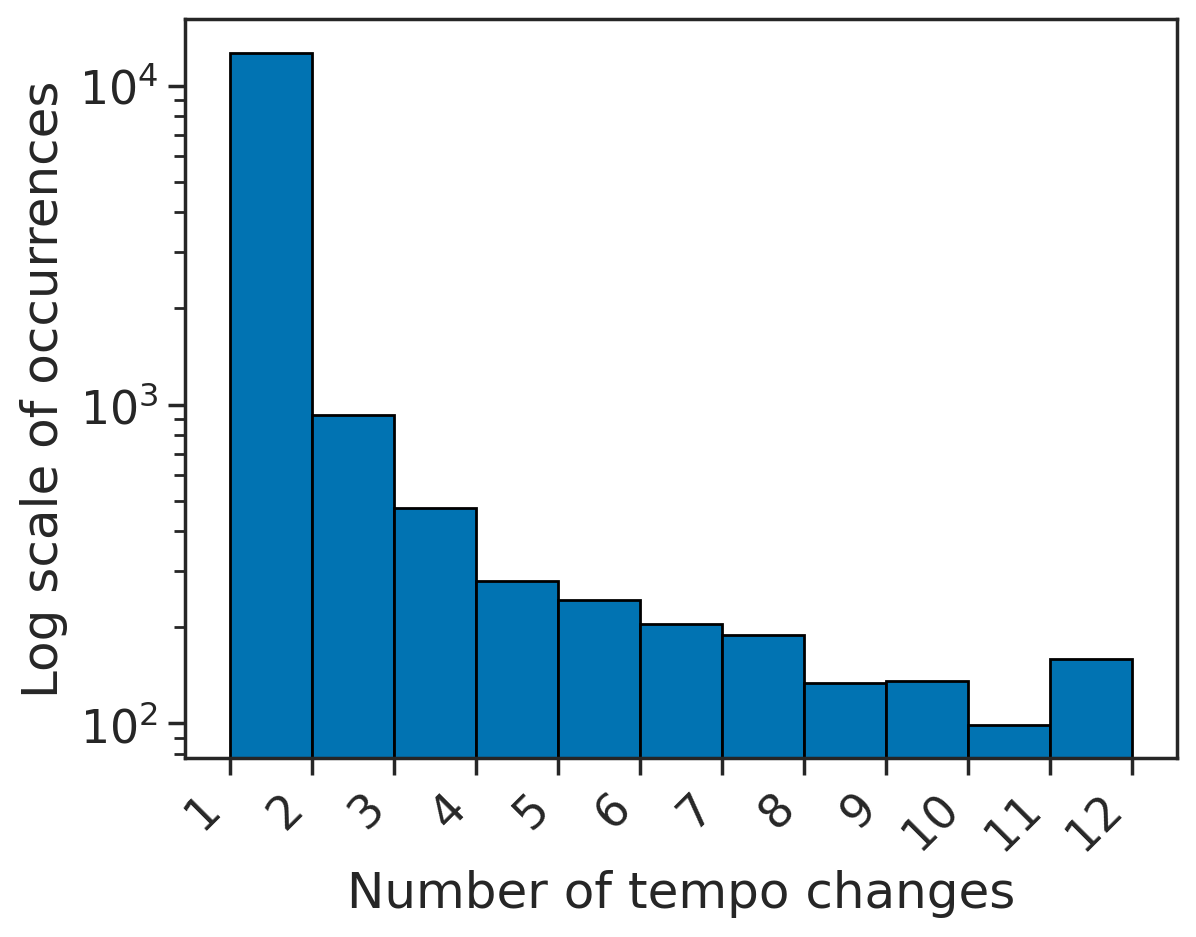

In [85]:

tempos_counts = [len(s['tempos']) for s in statistics]
bins = np.arange(1, 13) 

plt.hist(tempos_counts, bins=bins, edgecolor='black')
plt.xlabel('Number of tempo changes')
plt.ylabel('Log scale of occurrences')

plt.yscale('log')
plt.xticks(bins, rotation=45, ha='right')
plt.show()


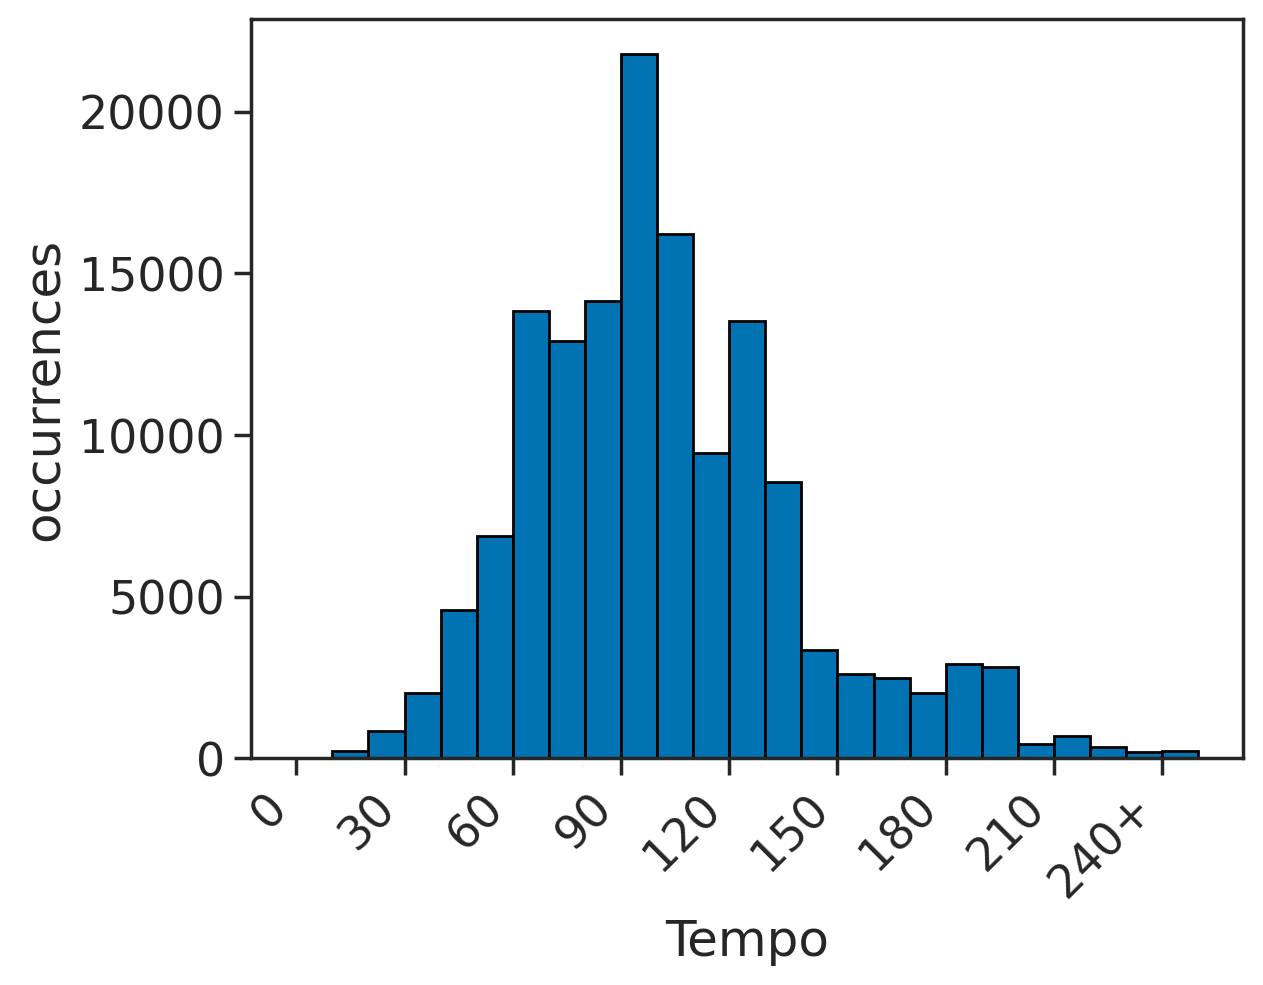

In [92]:
tempos = [i for s in statistics for i in s['tempos']]

bins = range(0, 260, 10)  # Define bins from 0 to 260 in increments of 10
plt.hist(tempos, bins=bins, edgecolor='black', log=False)

plt.xlabel('Tempo')
plt.ylabel('occurrences')

# Generate x-tick labels spaced according to the bins
xtick_positions = np.arange(0, 260, 30)  # Positions for every 30 units
xtick_labels = [str(x) for x in xtick_positions[:-1]] + ['240+']  # Add '240+' as the last label
plt.xticks(xtick_positions, xtick_labels, rotation=45, ha='right')

plt.show()


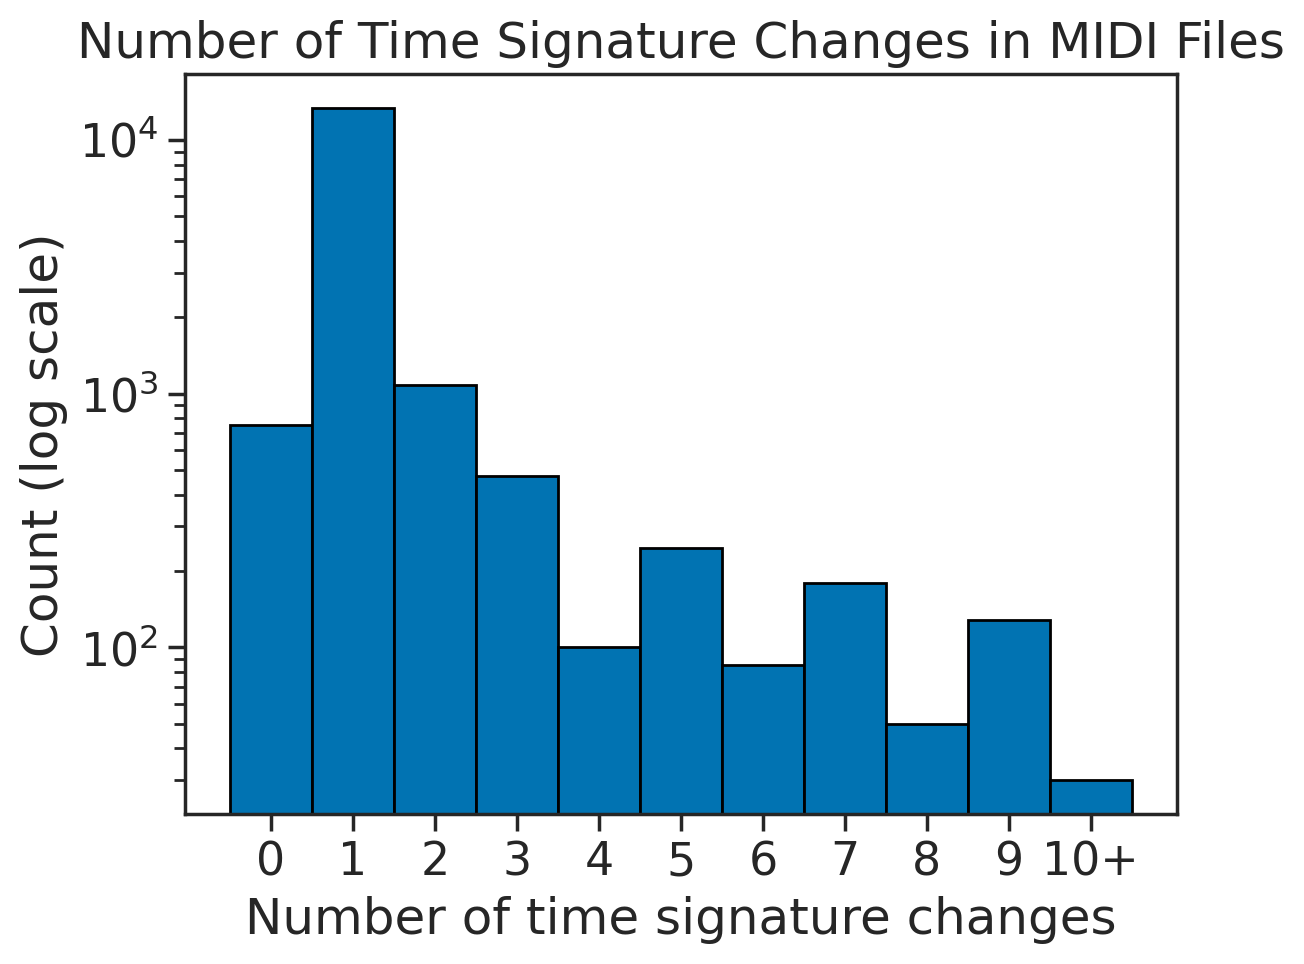

In [88]:
time_signature_changes = [len(s['time_signature_changes']) for s in statistics]

plt.hist(time_signature_changes, bins=np.arange(12) - 0.5, edgecolor='black', log=True)
plt.xlabel('Number of time signature changes')
plt.ylabel('Count (log scale)')
plt.xticks(range(11), list(range(10)) + ['10+'])
plt.title('Number of Time Signature Changes in MIDI Files')
plt.show()


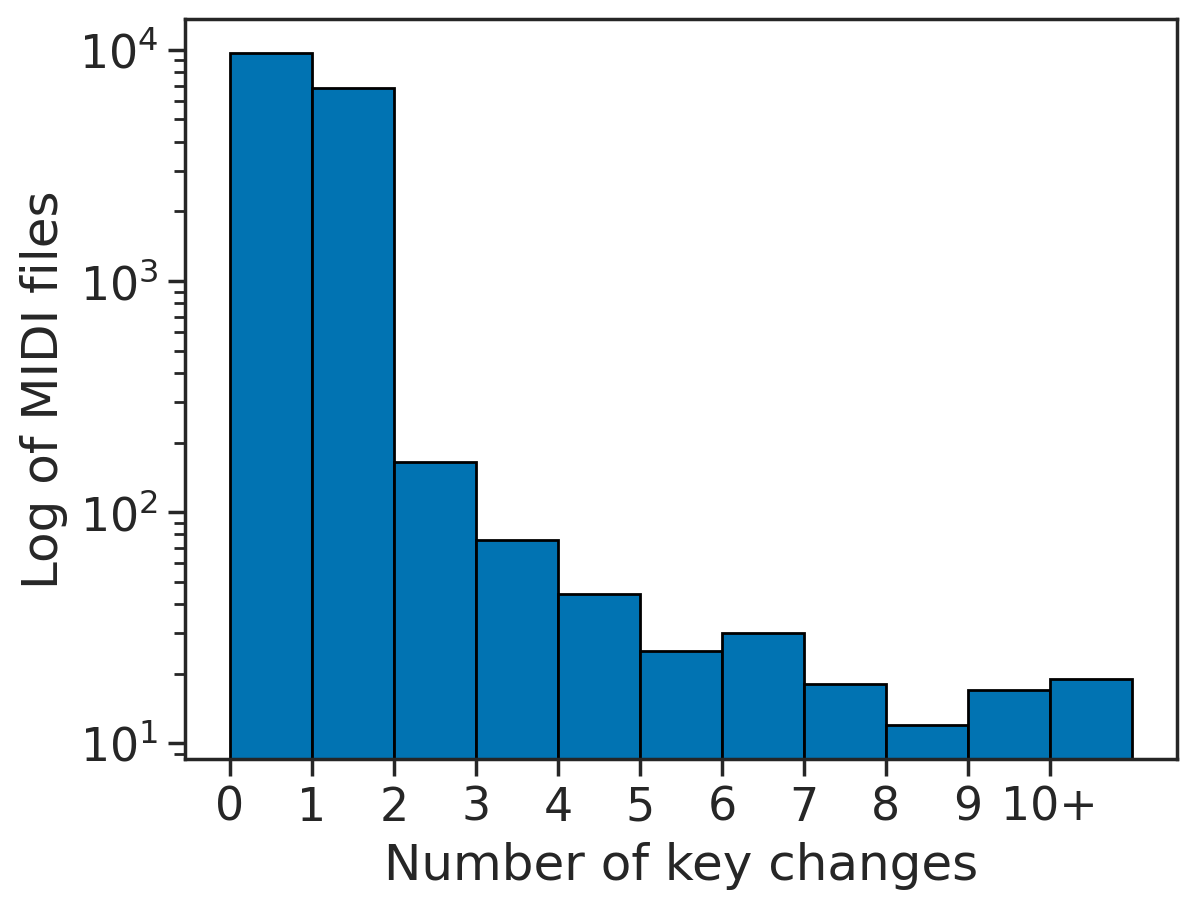

In [95]:
key_changes = [len(s['key_numbers']) for s in statistics]

bins = range(12)  # Define bins from 0 to 11
plt.hist(key_changes, bins=bins, edgecolor='black', log=True)

plt.xlabel('Number of key changes')
plt.ylabel('Log of MIDI files')

# Adjust x-axis ticks and labels
xtick_positions = range(11)  # Positions from 0 to 10
xtick_labels = list(range(10)) + ['10+']  # Labels for ticks
plt.xticks(xtick_positions, xtick_labels)

plt.show()


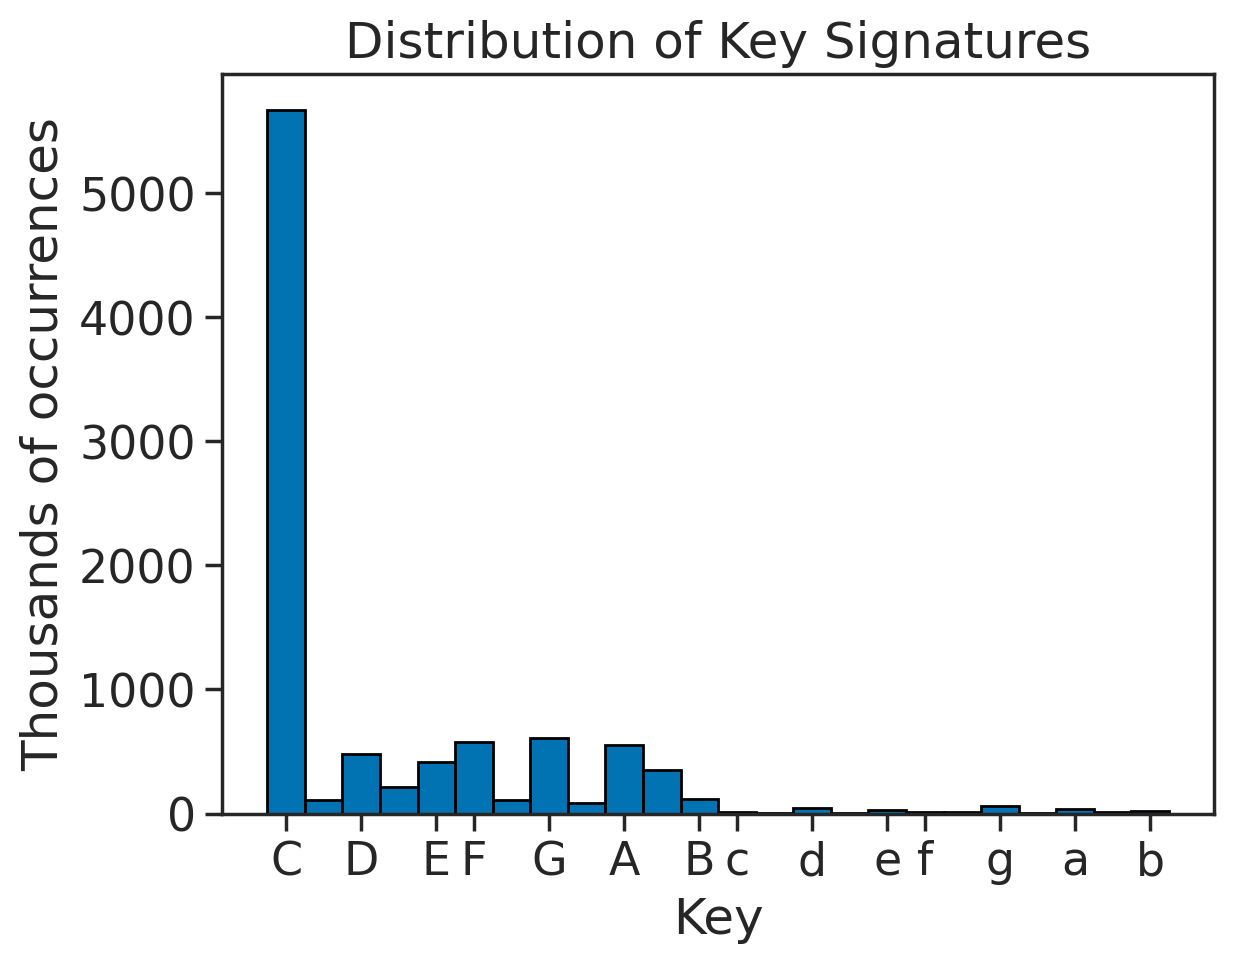

In [99]:
key_numbers = [i for s in statistics for i in s['key_numbers']]
bins = range(25)
plt.hist(key_numbers, bins=bins, edgecolor='black', align='left', )
plt.xticks([0, 2, 4, 5, 7, 9, 11, 12, 14, 16, 17, 19, 21, 23],
           ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'c', 'd', 'e', 'f', 'g', 'a', 'b'])

plt.xlabel('Key')
plt.ylabel('Thousands of occurrences')
plt.title('Distribution of Key Signatures')
plt.show()


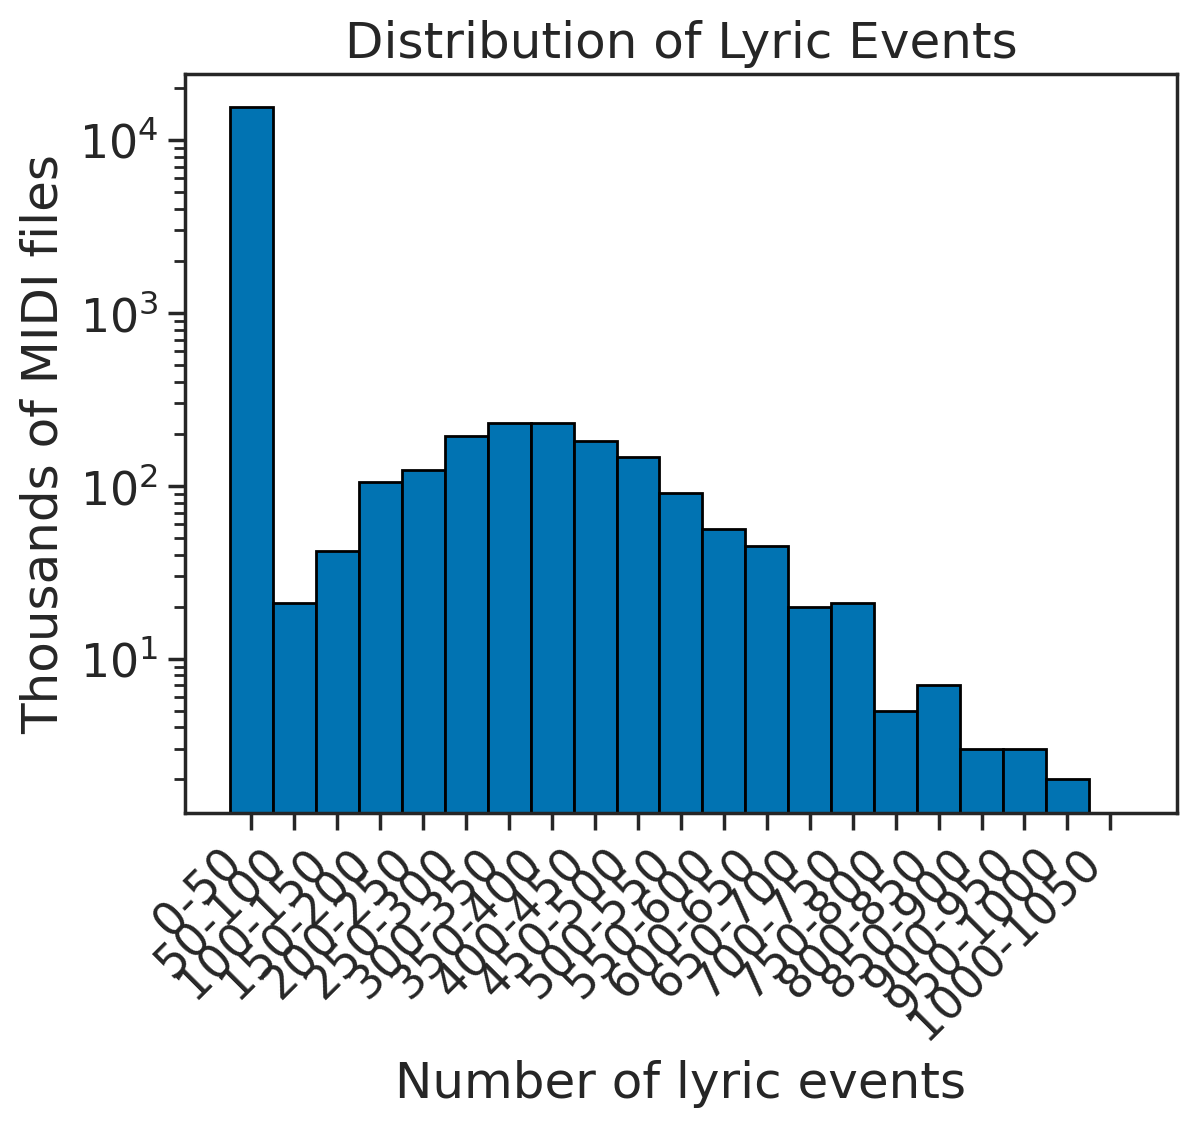

In [106]:

lyrics_counts = [len(s['lyrics']) for s in statistics]
bins = range(0, 1060, 50)
plt.hist(lyrics_counts, bins=bins, edgecolor='black', log = True)
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

plt.xticks(bin_centers)
xtick_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

plt.xticks(bin_centers, xtick_labels, rotation=45, ha='right')

plt.xlabel('Number of lyric events')
plt.ylabel('Thousands of MIDI files')
plt.title('Distribution of Lyric Events')
plt.show()


In [ ]:
# Import

In [35]:
import pretty_midi

def analyze_midi(midi_file_path):
    try:
        # Load the MIDI file
        midi = pretty_midi.PrettyMIDI(midi_file_path)
        
        # Print basic information
        print(f"Analyzing MIDI file: {midi_file_path}")
        print(f"Number of instruments: {len(midi.instruments)}")

        # Extract and print tempo changes
        tempos, times = midi.get_tempo_changes()
        print(f"Number of tempo changes: {len(tempos)}")
        for i in range(len(tempos)):
            print(f"Tempo at {times[i]}s: {tempos[i]} BPM")
        
        # Extract and print key signature changes
        key_signatures = midi.key_signature_changes
        print(f"Number of key signature changes: {len(key_signatures)}")
        for ks in key_signatures:
            print(f"Key: {ks.key_number} at {ks.time}s")

        # Extract and print time signature changes
        time_signatures = midi.time_signature_changes
        print(f"Number of time signature changes: {len(time_signatures)}")
        for ts in time_signatures:
            print(f"Time signature: {ts.numerator}/{ts.denominator} at {ts.time}s")
        
        # Extract and print lyrics (if any)
        lyrics = midi.lyrics
        if lyrics:
            print(f"Number of lyric events: {len(lyrics)}")
            for lyric in lyrics:
                print(f"Lyrics: {lyric.text} at {lyric.time}s")
        else:
            print("No lyrics found.")

        # Calculate additional statistics (e.g., note statistics)
        total_notes = sum([len(instrument.notes) for instrument in midi.instruments])
        print(f"Total number of notes across all instruments: {total_notes}")

        # Other statistics: Average note duration, etc.
        note_durations = [note.end - note.start for instrument in midi.instruments for note in instrument.notes]
        avg_duration = sum(note_durations) / len(note_durations) if note_durations else 0
        print(f"Average note duration: {avg_duration:.4f} seconds")

    except Exception as e:
        print(f"Error processing MIDI file: {e}")

# Example usage
dq_path = '../data/clean_midi/ABBA/Dancing Queen.1.mid'
midi_file_paths = ['../data/clean_midi/ABBA/Dancing Queen.1.mid' , '../data/clean_midi/ABBA/Dancing Queen.2.mid']

for file in midi_file_paths:
    analyze_midi(file)


Analyzing MIDI file: ../data/clean_midi/ABBA/Dancing Queen.1.mid
Number of instruments: 10
Number of tempo changes: 1
Tempo at 99.99999999999999s: 0.0 BPM
Number of key signature changes: 0
Number of time signature changes: 1
Time signature: 4/4 at 0.0s
No lyrics found.
Total number of notes across all instruments: 8311
Average note duration: 0.2585 seconds
Analyzing MIDI file: ../data/clean_midi/ABBA/Dancing Queen.2.mid
Number of instruments: 11
Number of tempo changes: 1
Tempo at 101.00159919198721s: 0.0 BPM
Number of key signature changes: 0
Number of time signature changes: 2
Time signature: 4/4 at 0.0s
Time signature: 4/4 at 2.3762s
No lyrics found.
Total number of notes across all instruments: 9058
Average note duration: 0.1526 seconds


In [ ]:
# We have multiple files of songs, E.g. Dancing QUeen 

In [37]:
import midi2audio
fs = midi2audio.FluidSynth('../../FluidR3_GM.sf2')

In [73]:
dq_path = '../data/clean_midi/ABBA/Dancing Queen.1.mid'
pm = pretty_midi.PrettyMIDI(dq_path)

program_numbers = [i.program for i in pm.instruments if not i.is_drum]
print("Program Numbers in the MIDI file:")
print(program_numbers)

Program Numbers in the MIDI file:
[1, 33, 94, 52, 90, 1, 94, 105, 48]


# Pickling the stats

In [107]:
import pickle

pickle_file_path = 'statistics.pkl'

# Open the file in write-binary mode and pickle the data
with open(pickle_file_path, 'wb') as f:
    pickle.dump(statistics, f)

print(f"Statistics pickled successfully to {pickle_file_path}")


Statistics pickled successfully to statistics.pkl


In [109]:
# # Loading code
# with open(pickle_file_path, 'rb') as f:
#     loaded_statistics = pickle.load(f)
